$$\LARGE\textbf{Water bottle challenge}$$

In this notebook, I will present my work on the 'watter bottle challenge'. First I start with analyzing the data. This involves looking at the data structure, number of labeled datapoints, and various plots which help me descide how to construct the classfier. 

Considering that there are only 2 labeled data points (1 $\textbf{frequency} \times \textbf{time}$ matrix for TOP hit and 1 for BOTTOM hit), a neural network based binary classifier is out of the question as it will overfit to the 2 datapoints. 

So, I design a Euclidean based classifier which, given a matrix data point, extracts $N$ features and compares the distance of the features with respect to the TOP and BOTTOM labeled features. Based on smallest distance, the classifier outputs 0 label for TOP, 1 for BOTTOM and if the distance is too similar, it outputs NONE.

After some research, I picked the following features most commonly used in processing frequency over time data:

- Overall mean magnitude
- Mean in low freq band (<500 Hz)
- Mean in mid freq band (500-2000 Hz)
- Mean in high freq band (>2000 Hz)
- Dominant frequency (peak freq averaged over time)
- Energy decay slope (log-energy vs time)
- Spectral centroid (weighted avg freq)

$\textbf{NOTE:}$ The number of features is a very important decision. Having very small number of features (1 or 2) is potentially not enough to successfully classify noisy data as the data can have similar distances to both TOP and BOTTOM features and thus we cannot break the tie. On the other hand, having too many features can slow down classification in instances where we are procecssing a large volume of data. Thus, I picked 7 features that I deemed most important.

I initially plot some of the features for the labeled TOP and BOTTOM data points to see how much they actually differ:

$\LARGE \textbf{Initial Feature Analysis}$

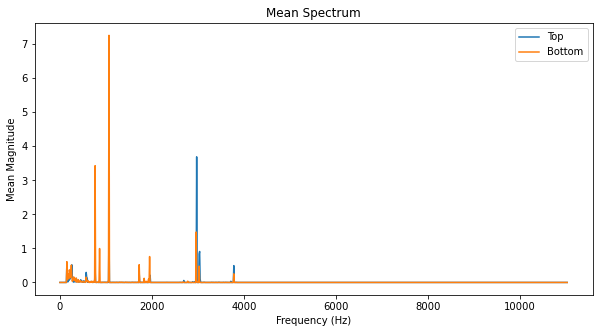

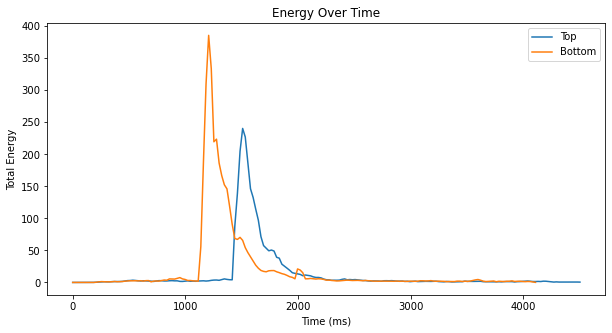

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load labeled examples
top = pd.read_csv('top.csv')
bottom = pd.read_csv('bottom.csv')

# Extract frequency and time axes
frequencies_top = top.iloc[:, 0].values  # first column is frequency
times_top = top.columns[1:].astype(float)  # skip first column

frequencies_bottom = top.iloc[:, 0].values  # first column is frequency
times_bottom = bottom.columns[1:].astype(float)  # skip first column

# Convert to 2D numpy arrays
top_matrix = top.iloc[:, 1:].values  # drop freq col
bottom_matrix = bottom.iloc[:, 1:].values

# Mean over time - for each frequency, compute the mean value over time.
top_mean_spectrum = top_matrix.mean(axis=1) 
bottom_mean_spectrum = bottom_matrix.mean(axis=1)

plt.figure(figsize=(10, 5))
plt.plot(frequencies_top, top_mean_spectrum, label='Top')
plt.plot(frequencies_bottom, bottom_mean_spectrum, label='Bottom')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mean Magnitude')
plt.title('Mean Spectrum')
plt.legend()
plt.show()


# Sum over frequencies for each time step - plot the decay of sounds over time.
top_energy = top_matrix.sum(axis=0) 
bottom_energy = bottom_matrix.sum(axis=0)

plt.figure(figsize=(10, 5))
plt.plot(times_top, top_energy, label='Top')
plt.plot(times_bottom, bottom_energy, label='Bottom')
plt.xlabel('Time (ms)')
plt.ylabel('Total Energy')
plt.title('Energy Over Time')
plt.legend()
plt.show()

Clearly, we can see some differences between the TOP and BOTTOM knife hits in both the total energy and mean frequency magnitude in lower and mid bands. 

Based on the analysis on only 2 data points, we can infer that data with higher total energy and higher mean frequency magnitudes in lower and mid bands represents the BOTTOM knife hit to the water bottle. Based on this we can construct the classifer but in order to be able to break ties in the data, we want to add more features which will separate the data more clearly in the feature space.

$\LARGE \textbf{Run Full Experiment}$

Here I run the full experiment with all the unlabeled data I have. In order to label the data, run impor function $\textbf{classify_preprocessed_audio}$ from file $\textbf{water_bottle_challenge.py}$.

In order to compare the unlabeled features with the features of the labeled TOP and BOTTOM data, we initially compute the TOP and BOTTOM data features inside $\textbf{water_bottle_challenge.py}$. This saves a little bit of computational time as there is no point in computing those features each time we want to process the unlabeled data.

For visual clarity, I also included the function $\textbf{plot_feature_comparison}$ which plots the features of the unlabeled data point and both TOP and BOTTOM features. One can use this for some visual inspection or presentation.

In [21]:
from water_bottle_challenge import classify_preprocessed_audio, plot_feature_comparison

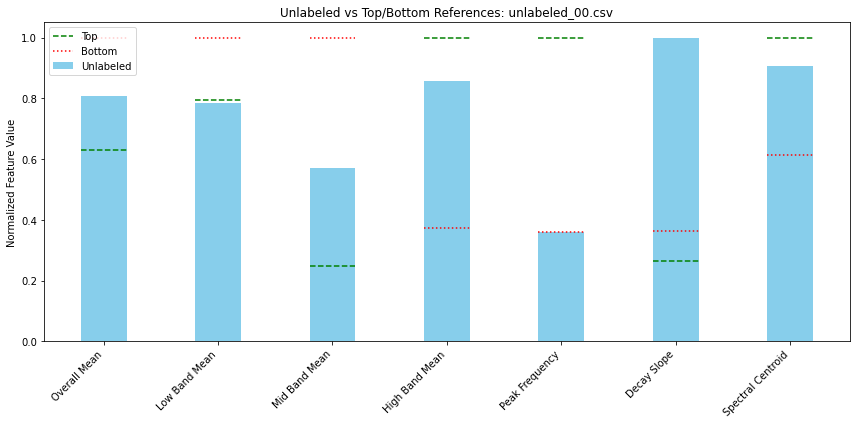

In [2]:
plot_feature_comparison('unlabeled_00.csv')

In [22]:
'''0 for top, 1 for bottom'''


labels = []

labels.append(classify_preprocessed_audio('unlabeled_00.csv'))
labels.append(classify_preprocessed_audio('unlabeled_10.csv'))
labels.append(classify_preprocessed_audio('unlabeled_15.csv'))
labels.append(classify_preprocessed_audio('unlabeled_22.csv'))
labels.append(classify_preprocessed_audio('unlabeled_23.csv'))
labels.append(classify_preprocessed_audio('unlabeled_25.csv'))
labels.append(classify_preprocessed_audio('unlabeled_26.csv'))
labels.append(classify_preprocessed_audio('unlabeled_27.csv'))
labels.append(classify_preprocessed_audio('unlabeled_31.csv'))
labels.append(classify_preprocessed_audio('unlabeled_37.csv'))
labels.append(classify_preprocessed_audio('unlabeled_38.csv'))
labels.append(classify_preprocessed_audio('unlabeled_42.csv'))
labels.append(classify_preprocessed_audio('unlabeled_45.csv'))
labels.append(classify_preprocessed_audio('unlabeled_56.csv'))
labels.append(classify_preprocessed_audio('unlabeled_61.csv'))
labels.append(classify_preprocessed_audio('unlabeled_68.csv'))
labels.append(classify_preprocessed_audio('unlabeled_78.csv'))
labels.append(classify_preprocessed_audio('unlabeled_85.csv'))
labels.append(classify_preprocessed_audio('unlabeled_86.csv'))
labels.append(classify_preprocessed_audio('unlabeled_88.csv'))
labels.append(classify_preprocessed_audio('unlabeled_95.csv'))
labels.append(classify_preprocessed_audio('unlabeled_98.csv'))

top_counter = 0
bottom_counter = 0

for l in labels:
    if l == 0:
        top_counter+=1
        print(f"Label: {l} - TOP")
    elif l == 1:
        bottom_counter += 1
        print(f"Label: {l} - BOTTOM")
    else:
        print("Cannot deduce the label!")

print("########################################")
print(f"TOP - label %: {top_counter/len(labels)}")
print(f"BOTTOM - label %: {bottom_counter/len(labels)}")
print(f"NONE - label %: {1 - (top_counter+bottom_counter)/len(labels)}")

Label: 1 - BOTTOM
Label: 1 - BOTTOM
Label: 1 - BOTTOM
Label: 0 - TOP
Label: 0 - TOP
Label: 1 - BOTTOM
Label: 1 - BOTTOM
Label: 0 - TOP
Label: 1 - BOTTOM
Label: 1 - BOTTOM
Label: 0 - TOP
Label: 0 - TOP
Label: 0 - TOP
Label: 1 - BOTTOM
Label: 1 - BOTTOM
Label: 1 - BOTTOM
Label: 0 - TOP
Label: 1 - BOTTOM
Label: 1 - BOTTOM
Label: 0 - TOP
Label: 0 - TOP
Label: 1 - BOTTOM
########################################
TOP - label %: 0.4090909090909091
BOTTOM - label %: 0.5909090909090909
NONE - label %: 0.0
